UNIVERSIDADE FEDERAL DO PARÁ

INSTITUTO DE CIÊNCIAS EXATAS E NATURAIS

FACULDADE DE COMPUTAÇÃO

CURSO DE BACHARELADO EM CIÊNCIA DA COMPUTAÇÃO

ATIVIDADE AVALIATIVA DE SISTEMAS DA COMPUTAÇÃO:
simulação do mapeamento direto e associativo. 
    
Docente: Claudomiro de Souza de Sales Junior.

Discente: Aimeê Miranda Ribeiro.
    
31 de Agosto de 2021

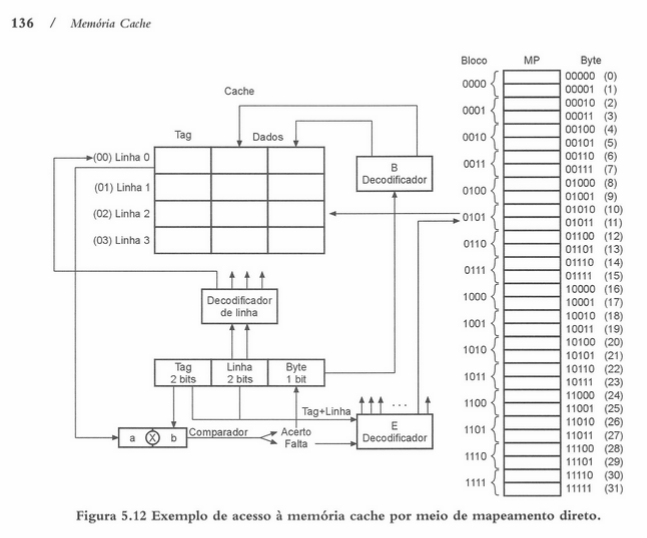

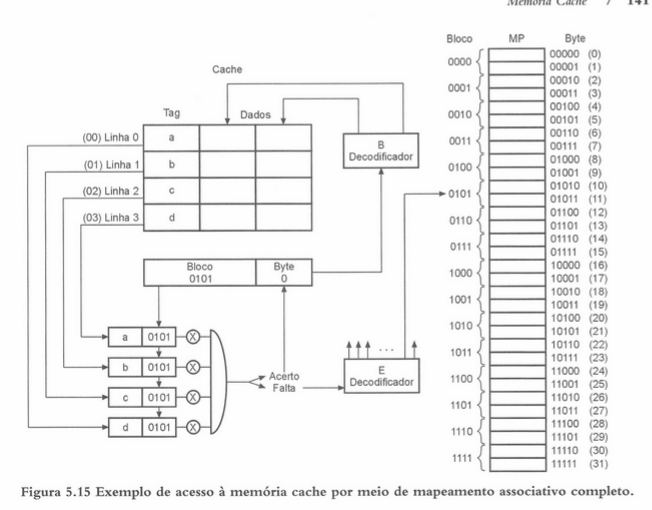

In [10]:
#importação de funções
import random

In [11]:
#inteiro
e = 5
print("e:",e)
m = 8
print("m:",m)
largconjunto = 2
print("largconjunto:",largconjunto)
camplinha = 2
print("camplinha:",camplinha)
campcelula = 1
print("campcelula:",campcelula)
campconjunto = 0
print("campconjunto:",campconjunto)
qtdlinhas = 4
print("qtdlinhas:",qtdlinhas)

#calculos
n = int(2**e)
print("n:",n)
tmp = m*n
print("tmp:",tmp)
campTAGa = e - camplinha - campcelula
print("campTAGa:",campTAGa)
campTAGd = e  - campcelula
print("campTAGd:",campTAGd)
campTAGac = e - campconjunto - campcelula
print("campTAGac:",campTAGac)

largblocos = int(n/2)
print("largblocos:",largblocos)
larglinhas = largblocos
print("larglinhas:",larglinhas)

qtdblocos = n/(largblocos/m)
print("qtdblocos:",qtdblocos)
qtdconjuntos = qtdlinhas/largconjunto
print("qtdconjuntos:",qtdconjuntos)

e: 5
m: 8
largconjunto: 2
camplinha: 2
campcelula: 1
campconjunto: 0
qtdlinhas: 4
n: 32
tmp: 256
campTAGa: 2
campTAGd: 4
campTAGac: 4
largblocos: 16
larglinhas: 16
qtdblocos: 16.0
qtdconjuntos: 2.0


In [12]:
#comparador
tl1 = []
tl2 = []
tl3 = []
tl4 = []
x=0
for i in range(camplinha+campTAGa): 
    tl1.append(str(format(i+x,'04b')))
    x+=1
    tl2.append(str(format(i+x,'04b')))
    x+=1
    tl3.append(str(format(i+x,'04b')))
    x+=1
    tl4.append(str(format(i+x,'04b')))
    
print(tl1)
print(tl2)
print(tl3)
print(tl4)


['0000', '0100', '1000', '1100']
['0001', '0101', '1001', '1101']
['0010', '0110', '1010', '1110']
['0011', '0111', '1011', '1111']


In [13]:
Fim1 = ""
while(Fim1 != "n"):
    UC0 = input("Olá usuário, escolha o mapeamento desejado: D para direto ou A para associativo: \n") 

    #associativo
    if(UC0 == "A"):
        #CACHE
        mdadoscache1 = ["",""]
        caixaE1 = ""
        mdadoscache2 = ["",""]
        caixaE2 = ""
        mdadoscache3 = ["",""]
        caixaE3 = ""
        mdadoscache4 = ["",""]
        caixaE4 = ""
        
        #MP
        mdadosmp = []
        for i in range(n):
            mdadosmp.append(format(i,'08b'))
            
        #processos:
        Fim = "y"
        while(Fim != "n"):
            REM = input("Forneça o endereço da célula de 5 digitos(em binário): \n")
            UC = input("Forneça E para escrita e L para leitura: \n")

            #quebra do endereço REM
            Ecelula = ""
            Etaga = ""
            REMinvert = REM[::-1]

            for i in range(campcelula):
                Ecelula += REMinvert[i]
            Ecelula = Ecelula[::-1]

            for i in range(campTAGa):
                Etaga += REMinvert[i+campcelula]
            Etaga = Etaga[::-1]
            BITCELULA = int(Ecelula)
            #operação de escrita
            if(UC == "E"):
                RDM = input("Forneça o valor a ser escrito na célula em binário (8bits): \n")
                #ifs verificam se o endereço do bloco está na cache e se sim, colocam o valor da celula 
                #na variável p, senão, dá coloca o valor e o endereço
                escolhalinha = random.randint(0,3)
                if(Etaga==caixaE1):
                    mdadoscache1[BITCELULA] = RDM
                    mdadosmp[int(REM,2)] = RDM
                elif(Etaga==caixaE2):
                    mdadoscache2[BITCELULA] = RDM
                    mdadosmp[int(REM,2)] = RDM
                elif(Etaga==caixaE3):
                    mdadoscache3[BITCELULA] = RDM
                    mdadosmp[int(REM,2)] = RDM
                elif(Etaga==caixaE4):
                    mdadoscache4[BITCELULA] = RDM
                    mdadosmp[int(REM,2)] = RDM
                else:
                    if(escolhalinha == 0):
                        caixaE1 = Etaga
                        mdadoscache1[BITCELULA] = RDM
                        mdadosmp[int(REM,2)] = RDM
                    if(escolhalinha == 1):
                        caixaE2 = Etaga
                        mdadoscache2[BITCELULA] = RDM
                        mdadosmp[int(REM,2)] = RDM
                    if(escolhalinha == 2):
                        caixaE3 = Etaga
                        mdadoscache3[BITCELULA] = RDM
                        mdadosmp[int(REM,2)] = RDM
                    if(escolhalinha == 3):
                        caixaE4 = Etaga
                        mdadoscache4[BITCELULA] = RDM
                        mdadosmp[int(REM,2)] = RDM
            #operação de leitura
            if(UC == "L"):

                #buscador da cache
                falta = 0
                #ifs verificam se o endereço do bloco está na cache e se sim, colocam o valor da celula 
                #na variável p, senão, dá um miss
                if((Etaga==caixaE1) and (mdadoscache1[BITCELULA]!="")):
                    p = mdadoscache1[BITCELULA]
                elif((Etaga==caixaE2) and (mdadoscache2[BITCELULA]!="")):
                    p = mdadoscache2[BITCELULA]
                elif((Etaga==caixaE3) and (mdadoscache3[BITCELULA]!="")):
                    p = mdadoscache3[BITCELULA]
                elif((Etaga==caixaE4) and (mdadoscache4[BITCELULA]!="")):
                    p = mdadoscache4[BITCELULA]
                else:
                    falta = 1
                #solicitação de dado da mp pela cache e transporte de dados da mp para a cache
                if(falta == 1):
                    BD = mdadosmp[int(REM,2)]
                    falta = 0
                    print("teve falta! \n")
                    escolhalinha = random.randint(0,3)

                #armazenamento do dado na cache
                    if(escolhalinha == 0):
                        caixaE1 = Etaga
                        mdadoscache1[BITCELULA] = BD
                        if(BITCELULA == 1):
                            BE2 = int(REM,2)-1
                            REM2 = format(BE2,'05b')
                            Ecelula2 = BITCELULA-1
                            BD2 = mdadosmp[int(REM2,2)]
                            mdadoscache1[Ecelula2] = BD2       
                        if(BITCELULA == 0):
                            BE2 = int(REM,2)+1
                            REM2 = format(BE2,'05b')
                            Ecelula2 = BITCELULA+1
                            BD2 = mdadosmp[int(REM2,2)]
                            mdadoscache1[Ecelula2] = BD2
                    if(escolhalinha == 1):
                        caixaE2 = Etaga
                        mdadoscache2[BITCELULA] = BD
                        if(BITCELULA == 1):
                            BE2 = int(REM,2)-1
                            REM2 = format(BE2,'05b')
                            Ecelula2 = BITCELULA-1
                            BD2 = mdadosmp[int(REM2,2)]
                            mdadoscache2[Ecelula2] = BD2       
                        if(BITCELULA == 0):
                            BE2 = int(REM,2)+1
                            REM2 = format(BE2,'05b')
                            Ecelula2 = BITCELULA+1
                            BD2 = mdadosmp[int(REM2,2)]
                            mdadoscache2[Ecelula2] = BD2
                    if(escolhalinha == 2):

                        caixaE2 = Etaga
                        mdadoscache3[BITCELULA] = BD
                        if(BITCELULA == 1):
                            BE2 = int(REM,2)-1
                            REM2 = format(BE2,'05b')
                            Ecelula2 = BITCELULA-1
                            BD2 = mdadosmp[int(REM2,2)]
                            mdadoscache3[Ecelula2] = BD2       
                        if(BITCELULA == 0):
                            BE2 = int(REM,2)+1
                            REM2 = format(BE2,'05b')
                            Ecelula2 = BITCELULA+1
                            BD2 = mdadosmp[int(REM2,2)]
                            mdadoscache3[Ecelula2] = BD2
                    if(escolhalinha == 3):
                        caixaE2 = Etaga
                        mdadoscache4[BITCELULA] = BD
                        if(BITCELULA == 1):
                            BE2 = int(REM,2)-1
                            REM2 = format(BE2,'05b')
                            Ecelula2 = BITCELULA-1
                            BD2 = mdadosmp[int(REM2,2)]
                            mdadoscache4[Ecelula2] = BD2       
                        if(BITCELULA == 0):
                            BE2 = int(REM,2)+1
                            REM2 = format(BE2,'05b')
                            Ecelula2 = BITCELULA+1
                            BD2 = mdadosmp[int(REM2,2)]
                            mdadoscache4[Ecelula2] = BD2
                    #buscador da cache
                        if(Etaga==caixaE1):
                            p = mdadoscache1[BITCELULA]
                        if(Etaga==caixaE2):
                            p = mdadoscache2[BITCELULA]
                        if(Etaga==caixaE3):
                            p = mdadoscache3[BITCELULA]
                        if(Etaga==caixaE4):
                            p = mdadoscache4[BITCELULA]
                print("Conteúdo da célula:",p,"\n")   
                print("Endereço da célula:",REM,"\n")
            Fim = input("Gostaria de realizar outra operação? y/n \n")

    #direto
    if(UC0 == "D"):
        #CACHE
        mdadoscache1 = ["",""]
        caixaE1 = ""
        mdadoscache2 = ["",""]
        caixaE2 = ""
        mdadoscache3 = ["",""]
        caixaE3 = ""
        mdadoscache4 = ["",""]
        caixaE4 = ""
        
        #MP
        mdadosmp = []
        for i in range(n):
            mdadosmp.append(format(i,'08b'))
            
        #processos:
        Fim = "y"
        while(Fim != "n"):
            REM = input("Forneça o endereço da célula de 5 digitos(em binário): \n")
            UC = input("Forneça E para escrita e L para leitura: \n")


            #quebra do endereço REM
            Ecelula = ""
            Elinha = ""
            Etaga = ""
            REMinvert = REM[::-1]
            for i in range(campcelula):
                Ecelula += REMinvert[i]
            Ecelula = Ecelula[::-1]
            for i in range(camplinha):
                Elinha += REMinvert[i+campcelula]
            Elinha = Elinha[::-1]
            for i in range(campTAGa):
                Etaga += REMinvert[i+campcelula+camplinha]
            Etaga = Etaga[::-1]
            BITCELULA = int(Ecelula)
            TL = Etaga+Elinha

            #operação de escrita
            if(UC == "E"):
                RDM = input("Forneça o valor a ser escrito na célula em binário (8bits): \n")
                #ifs verificam se o endereço do bloco está na cache e se sim, colocam o valor da celula 
                #na variável p, senão, dá coloca o valor e o endereço
                if(TL==caixaE1):
                    mdadoscache1[BITCELULA] = RDM
                    mdadosmp[int(REM,2)] = RDM
                    p = mdadoscache1[BITCELULA]
                else:
                    for i in range(len(TL)):
                        if(TL==tl1[i]):
                            caixaE1 = TL
                            mdadoscache1[BITCELULA] = RDM
                            p = mdadoscache1[BITCELULA]
                            mdadosmp[int(REM,2)] = RDM
                if(TL==caixaE2):
                    mdadoscache2[BITCELULA] = RDM
                    p = mdadoscache2[BITCELULA]
                    mdadosmp[int(REM,2)] = RDM
                else:
                    for i in range(len(TL)):
                        if(TL==tl2[i]):
                            caixaE2 = TL
                            mdadoscache2[BITCELULA] = RDM
                            p = mdadoscache2[BITCELULA]
                            mdadosmp[int(REM,2)] = RDM

                if(TL==caixaE3):
                    mdadoscache3[BITCELULA] = RDM
                    p = mdadoscache3[BITCELULA]
                    mdadosmp[int(REM,2)] = RDM
                else:
                    for i in range(len(TL)):
                        if(TL==tl3[i]):
                            caixaE3 = TL
                            mdadoscache3[BITCELULA] = RDM
                            p = mdadoscache3[BITCELULA]
                            mdadosmp[int(REM,2)] = RDM

                if(TL==caixaE4):
                    mdadoscache4[BITCELULA] = RDM
                    p = mdadoscache4[BITCELULA]
                    mdadosmp[int(REM,2)] = RDM
                else:
                    for i in range(len(TL)):
                        if(TL==tl4[i]):
                            caixaE4 = TL
                            mdadoscache4[BITCELULA] = RDM
                            p = mdadoscache4[BITCELULA]
                            mdadosmp[int(REM,2)] = RDM
            #operação de leitura
            if(UC == "L"):

                #buscador da cache
                falta = 0
                #ifs verificam se o endereço do bloco está na cache e se sim, colocam o valor da celula 
                #na variável p, senão, dá um miss
                if((TL==caixaE1) and (mdadoscache1[BITCELULA]!="")):
                    p = mdadoscache1[BITCELULA]
                elif((TL==caixaE2) and (mdadoscache2[BITCELULA]!="")):
                    p = mdadoscache2[BITCELULA]
                elif((TL==caixaE3) and (mdadoscache3[BITCELULA]!="")):
                    p = mdadoscache3[BITCELULA]
                elif((TL==caixaE4) and (mdadoscache4[BITCELULA]!="")):
                    p = mdadoscache4[BITCELULA]
                else:
                    falta = 1
                #solicitação de dado da mp pela cache e transporte de dados da mp para a cache
                if(falta == 1):
                    BD = mdadosmp[int(REM,2)]
                    Etl2 = ""
                    falta = 0
                    print("teve falta! \n")

                    for i in range(len(TL)):
                        if(TL==tl1[i]):
                            caixaE1 = TL
                            mdadoscache1[BITCELULA] = BD
                            if(BITCELULA == 1):
                                BE2 = int(REM,2)-1
                                REM2 = format(BE2,'05b')
                                Ecelula2 = BITCELULA-1
                                BD2 = mdadosmp[int(REM2,2)]
                                mdadoscache1[Ecelula2] = BD2       
                            if(BITCELULA == 0):
                                BE2 = int(REM,2)+1
                                REM2 = format(BE2,'05b')
                                Ecelula2 = BITCELULA+1
                                BD2 = mdadosmp[int(REM2,2)]
                                mdadoscache1[Ecelula2] = BD2   

                        if(TL==tl2[i]):
                            caixaE2 = TL
                            mdadoscache2[BITCELULA] = BD
                            if(BITCELULA == 1):
                                BE2 = int(REM,2)-1
                                REM2 = format(BE2,'05b')
                                Ecelula2 = BITCELULA-1
                                BD2 = mdadosmp[int(REM2,2)]
                                mdadoscache2[Ecelula2] = BD2       
                            if(BITCELULA == 0):
                                BE2 = int(REM,2)+1
                                REM2 = format(BE2,'05b')
                                Ecelula2 = BITCELULA+1
                                BD2 = mdadosmp[int(REM2,2)]
                                mdadoscache2[Ecelula2] = BD2    

                        if(TL==tl3[i]):
                            caixaE3 = TL
                            mdadoscache3[BITCELULA] = BD
                            if(BITCELULA == 1):
                                BE2 = int(REM,2)-1
                                REM2 = format(BE2,'05b')
                                Ecelula2 = BITCELULA-1
                                BD2 = mdadosmp[int(REM2,2)]
                                mdadoscache3[Ecelula2] = BD2       
                            if(BITCELULA == 0):
                                BE2 = int(REM,2)+1
                                REM2 = format(BE2,'05b')
                                Ecelula2 = BITCELULA+1
                                BD2 = mdadosmp[int(REM2,2)]
                                mdadoscache3[Ecelula2] = BD2

                        if(TL==tl4[i]):
                            caixaE4 = TL
                            mdadoscache4[BITCELULA] = BD
                            if(BITCELULA == 1):
                                BE2 = int(REM,2)-1
                                REM2 = format(BE2,'05b')
                                Ecelula2 = BITCELULA-1
                                BD2 = mdadosmp[int(REM2,2)]
                                mdadoscache4[Ecelula2] = BD2       
                            if(BITCELULA == 0):
                                BE2 = int(REM,2)+1
                                REM2 = format(BE2,'05b')
                                Ecelula2 = BITCELULA+1
                                BD2 = mdadosmp[int(REM2,2)]
                                mdadoscache4[Ecelula2] = BD2

                    #buscador da cache
                        if(TL==caixaE1):
                            p = mdadoscache1[BITCELULA]
                        if(TL==caixaE2):
                            p = mdadoscache2[BITCELULA]
                        if(TL==caixaE3):
                            p = mdadoscache3[BITCELULA]
                        if(TL==caixaE4):
                            p = mdadoscache4[BITCELULA]

                print("Conteúdo da célula:",p,"\n")   
                print("Endereço da célula:",REM,"\n")
            Fim = input("Gostaria de realizar outra operação? y/n \n")
    Fim1 = input("Gostaria de realizar outra operação? y/n \n")

Olá usuário, escolha o mapeamento desejado: D para direto ou A para associativo: D
Forneça o endereço da célula de 5 digitos(em binário):11111
Forneça E para escrita e L para leitura:L
teve falta!
Conteúdo da célula: 00011111
Endereço da célula: 11111
Gostaria de realizar outra operação? y/n y
Forneça o endereço da célula de 5 digitos(em binário):00000
Forneça E para escrita e L para leitura:E
Forneça o valor a ser escrito na célula em binário (8bits): 10111111
Gostaria de realizar outra operação? y/n n
Gostaria de realizar outra operação? y/nn


In [14]:
#cache
print("linha0",mdadoscache1)
print("linha1",mdadoscache2)
print("linha2",mdadoscache3)
print("linha3",mdadoscache4)

linha0 ['10111111', '']
linha1 ['', '']
linha2 ['', '']
linha3 ['00011110', '00011111']


In [16]:
for i in range(n):
    print(mdadosmp[i])

10111111
00000001
00000010
00000011
00000100
00000101
00000110
00000111
00001000
00001001
00001010
00001011
00001100
00001101
00001110
00001111
00010000
00010001
00010010
00010011
00010100
00010101
00010110
00010111
00011000
00011001
00011010
00011011
00011100
00011101
00011110
00011111
